In [1]:
import tensorflow as tf
from tensorflow import keras


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
url = 'https://raw.githubusercontent.com/sirapat-thianphan/SeminarII_Sirapat/master/events_bs2_2.csv'
loaded_data = pd.read_csv(url, sep=',', header=0)

In [4]:
loaded_data.head(10)

,tactic0_id,longitude,latitude,NEAR_CCTV_,NEAR_MOOBA,MOOBAN_EST,MOOBAN_LEV,NEAR_UNITS,UNIT_TYPE,NEAR_VEHIC,VEHICLES_T,NEAR_NAIS_,NAIS_TYPE,NEAR_DIST
0,1,101.19182,6.13009,3467.485002,85.604275,0.3,0.25,927.963005,5,1308.145156,0.7,284.929088,3,27.677967
1,0,101.26577,6.41964,972.895329,1515.131446,0.3,0.25,1855.001821,4,2805.680397,0.7,1321.192664,1,1077.837387
2,1,101.14605,6.68195,4535.321847,372.279866,0.7,1.00,294.153727,7,212.795421,0.7,323.187802,10,97.315259
3,1,101.22266,6.85446,240.146910,333.135614,0.3,0.25,1591.508482,3,407.629181,0.3,155.356802,3,6.634046
4,0,101.34695,6.45786,242.448908,1172.773291,0.3,0.25,558.423389,5,701.641769,0.7,620.660475,5,31.915022
5,0,100.97757,6.65426,4096.016638,1315.821482,0.3,0.25,1716.603590,5,6956.354136,0.3,14218.082300,5,1124.033888
6,0,101.74995,6.27591,2686.242719,932.762119,0.7,1.00,1707.460629,4,3448.168296,0.7,69.781556,6,71.977883
7,0,101.62470,6.71488,580.185597,403.194092,0.3,0.25,567.060214,4,1545.663021,0.7,80.889155,4,35.425075
8,1,101.28660,6.72085,302.995168,143.336508,0.7,1.00,1104.123671,4,363.863675,0.7,1144.968962,3,25.827262
9,0,101.45094,6.49835,2562.292453,250.031476,0.3,0.25,3504.811321,4,7015.471466,0.7,2175.258547,6,14.428984


In [5]:
X_pre = loaded_data.iloc[:,1:]
y_pre = loaded_data.iloc[:,0]

In [6]:
X_pre.head(5)

,longitude,latitude,NEAR_CCTV_,NEAR_MOOBA,MOOBAN_EST,MOOBAN_LEV,NEAR_UNITS,UNIT_TYPE,NEAR_VEHIC,VEHICLES_T,NEAR_NAIS_,NAIS_TYPE,NEAR_DIST
0,101.19182,6.13009,3467.485002,85.604275,0.3,0.25,927.963005,5,1308.145156,0.7,284.929088,3,27.677967
1,101.26577,6.41964,972.895329,1515.131446,0.3,0.25,1855.001821,4,2805.680397,0.7,1321.192664,1,1077.837387
2,101.14605,6.68195,4535.321847,372.279866,0.7,1.00,294.153727,7,212.795421,0.7,323.187802,10,97.315259
3,101.22266,6.85446,240.146910,333.135614,0.3,0.25,1591.508482,3,407.629181,0.3,155.356802,3,6.634046
4,101.34695,6.45786,242.448908,1172.773291,0.3,0.25,558.423389,5,701.641769,0.7,620.660475,5,31.915022


In [7]:
y_pre.head(5)

0    1
1    0
2    1
3    1
4    0
Name: tactic0_id, dtype: int64

In [8]:
#MinMax Normalized in the input feature
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X = sc.fit_transform(X_pre)

/Users/kratung/anaconda3/envs/tfdeeplearning/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [9]:
df = pd.DataFrame(data=X)   
df.head(5)                         # We still the zero problem in the column 4, 5 and 9

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.491497,0.254955,0.107703,0.005184,0.0,0.0,0.028806,0.363636,0.037864,1.0,0.006080,0.222222,0.001228
1,0.533348,0.455602,0.030219,0.091754,0.0,0.0,0.057583,0.272727,0.081210,1.0,0.028261,0.000000,0.047830
2,0.465594,0.637373,0.140871,0.022545,1.0,1.0,0.009131,0.545455,0.006159,1.0,0.006899,1.000000,0.004318
3,0.508950,0.756916,0.007459,0.020174,0.0,0.0,0.049404,0.181818,0.011799,0.0,0.003306,0.222222,0.000294
4,0.579290,0.482087,0.007531,0.071022,0.0,0.0,0.017335,0.363636,0.020309,1.0,0.013266,0.444444,0.001416


In [10]:
X_pre_numpy = X_pre.values  # convert panda dataframe to numpy array
X_pre_numpy

array([[1.01191820e+02, 6.13009000e+00, 3.46748500e+03, ...,
        2.84929088e+02, 3.00000000e+00, 2.76779675e+01],
       [1.01265770e+02, 6.41964000e+00, 9.72895329e+02, ...,
        1.32119266e+03, 1.00000000e+00, 1.07783739e+03],
       [1.01146050e+02, 6.68195000e+00, 4.53532185e+03, ...,
        3.23187802e+02, 1.00000000e+01, 9.73152590e+01],
       ...,
       [1.00829740e+02, 6.66129000e+00, 6.35483105e+03, ...,
        2.24800867e+04, 5.00000000e+00, 3.82198525e+03],
       [1.01305360e+02, 6.55308000e+00, 1.66363464e+02, ...,
        3.23205756e+02, 6.00000000e+00, 7.04019195e+01],
       [1.01554750e+02, 6.42124000e+00, 3.85837311e+03, ...,
        1.95051624e+02, 5.00000000e+00, 1.68364332e+02]])

In [11]:
X[:, 4] = X_pre_numpy[:, 4]
X[:, 5] = X_pre_numpy[:, 5]
X[:, 9] = X_pre_numpy[:, 9]

In [12]:
df = pd.DataFrame(data=X)   
df.head(5)                          # Now, the zero problems are already solved

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.491497,0.254955,0.107703,0.005184,0.3,0.25,0.028806,0.363636,0.037864,0.7,0.006080,0.222222,0.001228
1,0.533348,0.455602,0.030219,0.091754,0.3,0.25,0.057583,0.272727,0.081210,0.7,0.028261,0.000000,0.047830
2,0.465594,0.637373,0.140871,0.022545,0.7,1.00,0.009131,0.545455,0.006159,0.7,0.006899,1.000000,0.004318
3,0.508950,0.756916,0.007459,0.020174,0.3,0.25,0.049404,0.181818,0.011799,0.3,0.003306,0.222222,0.000294
4,0.579290,0.482087,0.007531,0.071022,0.3,0.25,0.017335,0.363636,0.020309,0.7,0.013266,0.444444,0.001416


In [13]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y_pre, test_size=0.2)

In [16]:
X_train.shape

(6400, 13)

In [17]:
from keras import models
from keras import layers
from keras import regularizers

Using TensorFlow backend.


In [18]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_dim=13))
    model.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer ='rmsprop', loss='binary_crossentropy', metrics =['accuracy'])
    return model

In [19]:
# K-Fold Validation

k=4
num_val_samples = len(X_train) // k 
num_epochs = 200
all_loss_histories = []

for i in range(k):
    print('processing fold #', i)
    val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    partial_train_data = np.concatenate( [X_train[:i * num_val_samples], X_train[(i + 1) * num_val_samples:]], axis=0)
    partial_train_targets = np.concatenate( [y_train[:i * num_val_samples], y_train[(i + 1) * num_val_samples:]], axis=0)

    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets, validation_data=(val_data, val_targets), epochs = num_epochs, batch_size=16, verbose=0)
    loss_history = history.history['val_loss']
    all_loss_histories.append(loss_history)
    

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [20]:
# Average of the per-epoch acc for all folds
average_loss_history = [ np.mean( [x[i] for x in all_loss_histories]) for i in range(num_epochs)]


In [21]:
average_loss_history

[0.7059603963792325,
 0.6921563950181008,
 0.6837586744129658,
 0.6848529529571533,
 0.6810134790837765,
 0.6804079242050648,
 0.6771269680559635,
 0.6708974821865559,
 0.6733702725172043,
 0.6724382762610912,
 0.6678482998162508,
 0.6736473555862904,
 0.6651678182929754,
 0.6629372061789035,
 0.6664903990924358,
 0.6615758237242699,
 0.67318279273808,
 0.6666967967152595,
 0.6644180432707071,
 0.6676578418910504,
 0.662354848831892,
 0.6608123693615199,
 0.6593817975372076,
 0.6577399107068778,
 0.6659826005995274,
 0.6605007057636976,
 0.6567047636955976,
 0.665608001500368,
 0.6558811086416245,
 0.6700843507051468,
 0.6610022835433483,
 0.6589027574658394,
 0.6574948313087224,
 0.6539255993813277,
 0.6568681795895099,
 0.6638033112138509,
 0.6582368430495262,
 0.6544881426542997,
 0.6576876287162303,
 0.6645723406225443,
 0.6538142175227403,
 0.6586395648121834,
 0.658900950551033,
 0.6561313274502755,
 0.6575966227054596,
 0.655138281211257,
 0.6529022885859013,
 0.6575121525675058

In [22]:
# Average of loss
np.mean(average_loss_history)

0.6551875534161925

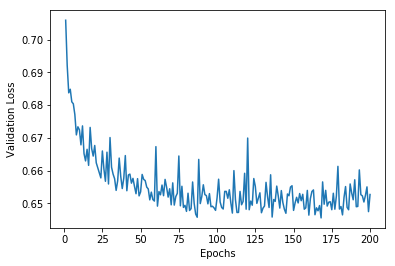

In [23]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_loss_history) +1), average_loss_history)
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.show()

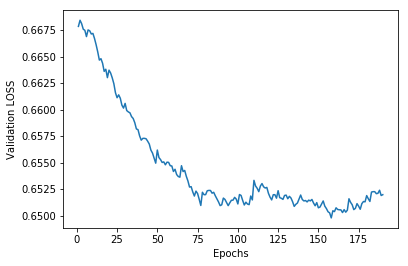

In [24]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous*factor + point*(1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_loss_history = smooth_curve(average_loss_history[10:])

plt.plot(range(1, len(smooth_loss_history)+1), smooth_loss_history)
plt.xlabel('Epochs')
plt.ylabel('Validation LOSS')
plt.show()

In [25]:
model = build_model()
model.fit(X_train, y_train, epochs=75, batch_size=32, verbose=0)
test_loss_score, test_acc_score = model.evaluate(X_test, y_test)

1600/1600 [==============================] - 0s 157us/step


In [26]:
print(test_acc_score)

0.646875


In [27]:
print(test_loss_score)

0.6509544849395752
